In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import datetime
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
uploaded = files.upload()  # local upload

Saving Airbnb_NYC.csv to Airbnb_NYC (1).csv


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Load your cleaned dataset (assuming you've already handled missing values)
raw_data = pd.read_csv("Airbnb_NYC.csv")

# Remove any leading/trailing spaces in the column names
raw_data.columns = raw_data.columns.str.strip()

# Drop rows with missing values (if any)
raw_data_cleaned = raw_data.dropna()

# Drop duplicates to ensure unique records
raw_data_cleaned = raw_data_cleaned.drop_duplicates()

# Replace 'value' with 1 in the 'Boroughs' column
raw_data_cleaned['Boroughs'] = raw_data_cleaned['Boroughs'].apply(lambda x: 0 if x == "Bronx"
                                    else 1 if x == "Brooklyn"
                                    else 2 if x == "Manhattan"
                                    else 3 if x == "Queens"
                                    else 4).astype(int)  # Staten Island

# Replace 'value' with 1 in the 'Prop_Type' column
raw_data_cleaned['Prop_Type'] = raw_data_cleaned['Prop_Type'].apply(lambda x: 0 if x == "PrivateRoom"
                                    else 1 if x == "EntireHome"
                                    else 2).astype(int) # if x == "SharedRoom"

# Identify strictly numerical columns (float64 and int64 types)
numerical_cols = raw_data_cleaned.columns[raw_data_cleaned.dtypes != 'object']

# Exclude specific columns (e.g., 'column1', 'column2', 'column3')
exclude_columns = ['Boroughs', 'Latitude', 'Longitude', 'Prop_Type', 'Review_Cnt', 'Reviews30d', 'Min_Nights']
numerical_cols = [col for col in numerical_cols if col not in exclude_columns]

print("Numerical columns:")
print(numerical_cols)

# Drop rows where 'Reviews30d' is greater than 30
raw_data_cleaned = raw_data_cleaned[raw_data_cleaned['Reviews30d'] <= 30]

# Removing rows with extremely high minimum nights
raw_data_cleaned = raw_data_cleaned[raw_data_cleaned['Min_Nights'] <= 10]

# Create a new dataframe to store the cleaned data
raw_data_no_outliers = raw_data_cleaned.copy()

outliers_count = 0

# Loop through each numerical column and remove outliers based on percentiles
for col in numerical_cols:
    # Calculate Q1 (20th percentile) and Q3 (80th percentile) of the column
    Q1 = raw_data_cleaned[col].quantile(0.20)
    Q3 = raw_data_cleaned[col].quantile(0.5)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = raw_data_cleaned[(raw_data_cleaned[col] < lower_bound) | (raw_data_cleaned[col] > upper_bound)]

    # Count the number of outliers
    outliers_count += len(outliers)

    # Remove outliers for this specific column but do not overwrite the entire dataset
    raw_data_no_outliers = raw_data_cleaned[~((raw_data_cleaned[col] < lower_bound) | (raw_data_cleaned[col] > upper_bound))]

    # Display the outliers that were removed
    print(f"{col} outliers that were removed:")
    print(outliers[col])

    # Calculate the average (mean) of the column
    average_col = raw_data_no_outliers[col].mean()
    print(f"Average of {col} column is: {average_col}\n")

print(f"Total outliers removed: {outliers_count}")






#raw_data_no_outliers['Price'] = np.log(raw_data_no_outliers['Price'])






# Step 6: Split Features and Target
training_inputs = raw_data_no_outliers.drop(columns=["Price"])  # Drop the target column
outputs = raw_data_no_outliers["Price"]

# Split the data into training and test sets
input_train, input_test, output_train, output_test = train_test_split(training_inputs, outputs, test_size=0.20, random_state=124)

# Step 8: Scale Features using StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
input_train = scaler.fit_transform(input_train)  # Scaling the training data
input_test = scaler.transform(input_test)        # Scaling the test data based on the training set statistics

# Now, input_train and input_test are scaled and ready for model training


Numerical columns:
['Host_Listing_Cnt', 'Days_Available', 'Price']
Host_Listing_Cnt outliers that were removed:
4        3.0
6        3.0
7        3.0
9        2.0
11       2.0
        ... 
38718    2.0
38721    2.0
38722    6.0
38725    6.0
38727    6.0
Name: Host_Listing_Cnt, Length: 11014, dtype: float64
Average of Host_Listing_Cnt column is: 1.0

Days_Available outliers that were removed:
2        354
5        300
7        134
8        125
9        248
        ... 
38725    115
38727    247
38728    106
38731    232
38732    250
Name: Days_Available, Length: 13000, dtype: int64
Average of Days_Available column is: 16.852610030706245

Price outliers that were removed:
8        175.0
10       300.0
14       350.0
16       200.0
60       165.0
         ...  
38695    249.0
38709    175.0
38715    180.0
38720    195.0
38727    289.0
Name: Price, Length: 8879, dtype: float64
Average of Price column is: 88.29588131953933

Total outliers removed: 32893


In [ ]:
model = Sequential([
    Dense(512, input_shape=(input_train.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),


    Dense(1)  # Output layer (linear activation)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 10: Compile the Model with MAE as the loss function
model.compile(
    optimizer=Adam(learning_rate=0.0015),
    loss='mean_absolute_error',
    metrics=['mean_absolute_percentage_error']
)


In [ ]:
# Step 11: Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]#, restore_best_weights=True)]
    #,ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)]

# Step 12: Train the Model with More Epochs and Smaller Batch Size
history = model.fit(
    input_train, output_train,
    validation_data=(input_test, output_test),
    epochs=60,
    batch_size=128,  # Smaller batch size
    callbacks=callbacks,
    verbose=1
)

Epoch 1/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 46.8363 - mean_absolute_percentage_error: 57.6388 - val_loss: 25.0244 - val_mean_absolute_percentage_error: 33.5772
Epoch 2/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 24.6417 - mean_absolute_percentage_error: 34.7830 - val_loss: 22.4226 - val_mean_absolute_percentage_error: 31.1514
Epoch 3/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 21.8565 - mean_absolute_percentage_error: 30.0760 - val_loss: 20.7646 - val_mean_absolute_percentage_error: 29.2981
Epoch 4/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20.1145 - mean_absolute_percentage_error: 26.3688 - val_loss: 20.0677 - val_mean_absolute_percentage_error: 27.9641
Epoch 5/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.8037 - mean_absolute_percentage_error: 25.7827 - val_loss: 20.1819 - val_mean_absolute_percentage_error: 24.0700
Epoch 6/60
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.8747 - mean_absolute_percentage_error: 25.6538 - val_los

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


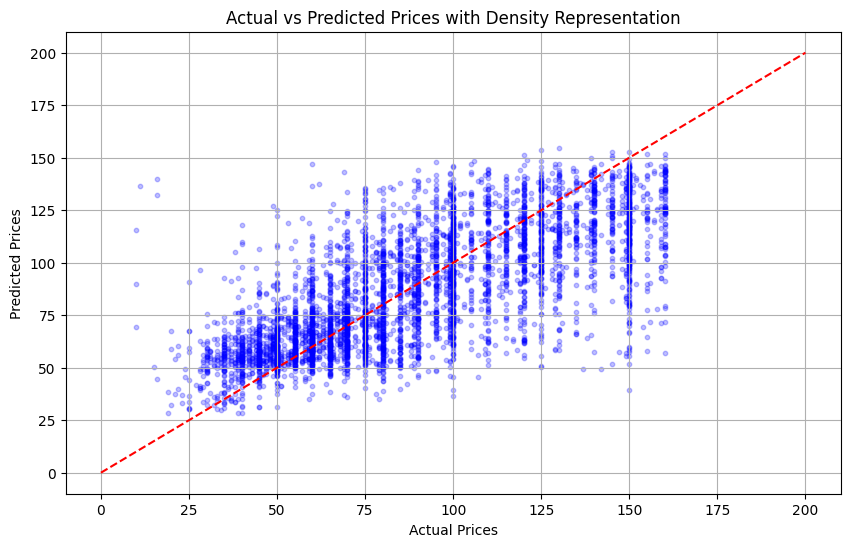

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the model and test data
predicted_log_prices = model.predict(input_test)

# Revert the log transformation for actual and predicted prices
actual_prices = output_test # np.exp(output_test)
predicted_prices = predicted_log_prices # np.exp(predicted_log_prices)

# Plot actual vs predicted prices as a scatter plot with transparency
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, color="blue", alpha=0.25, s=10)

# Plot a red line for ideal prediction (1:1 line)
plt.plot([0, 200], [0, 200], color="red", linestyle="--", linewidth=1.5)

# Set title and labels
plt.title("Actual vs Predicted Prices with Density Representation")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Add grid to the plot
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Access training history data
train_loss = history.history['loss']
train_mape = history.history['mean_absolute_percentage_error']
val_loss = history.history['val_loss']
val_mape = history.history['val_mean_absolute_percentage_error']

# Print the data for each epoch
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch + 1}/{len(train_loss)} - "
          f"loss: {train_loss[epoch]:.4f}, "
          f"mean_absolute_percentage_error: {train_mape[epoch]:.4f}, "
          f"val_loss: {val_loss[epoch]:.4f}, "
          f"val_mean_absolute_percentage_error: {val_mape[epoch]:.4f}")


Epoch 1/34 - loss: 32.6012, mean_absolute_percentage_error: 43.4177, val_loss: 25.0244, val_mean_absolute_percentage_error: 33.5772
Epoch 2/34 - loss: 24.1452, mean_absolute_percentage_error: 34.0677, val_loss: 22.4226, val_mean_absolute_percentage_error: 31.1514
Epoch 3/34 - loss: 21.2389, mean_absolute_percentage_error: 28.8011, val_loss: 20.7646, val_mean_absolute_percentage_error: 29.2981
Epoch 4/34 - loss: 20.1088, mean_absolute_percentage_error: 26.3876, val_loss: 20.0677, val_mean_absolute_percentage_error: 27.9641
Epoch 5/34 - loss: 19.7608, mean_absolute_percentage_error: 25.8096, val_loss: 20.1819, val_mean_absolute_percentage_error: 24.0700
Epoch 6/34 - loss: 19.5094, mean_absolute_percentage_error: 25.3281, val_loss: 19.0934, val_mean_absolute_percentage_error: 25.1460
Epoch 7/34 - loss: 19.2091, mean_absolute_percentage_error: 24.9595, val_loss: 19.1004, val_mean_absolute_percentage_error: 26.1756
Epoch 8/34 - loss: 19.1579, mean_absolute_percentage_error: 24.7558, val_los

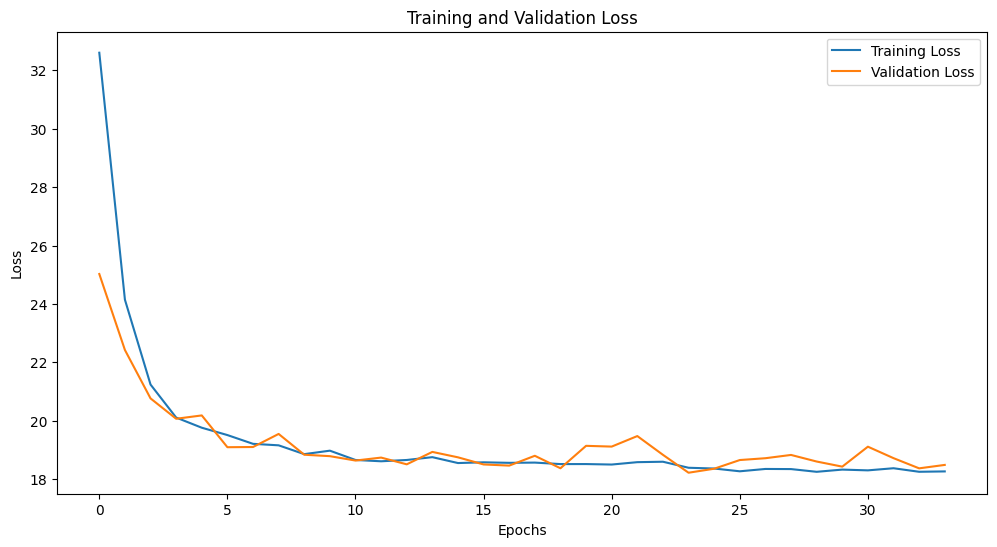

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()